# Analisis del problema
El objetivo es predecir la etapa de cirrosis hepática de un paciente utilizando un conjunto de variables clínicas y demográficas. Estas variables incluyen tanto datos categóricos como numéricos, que reflejan las características del paciente y los resultados de sus pruebas médicas.

# Entendimiento de los datos
`ID` (numérica): Identificador único del paciente.

`N_Days` (numérica): Número de días desde el diagnóstico de la cirrosis.

`Status` (categórica): Estado del paciente, puede ser "D" (fallecido), "C" (censurado), o "CL" (censurado vivo).

`Drug` (categórica): Tipo de tratamiento, como "D-penicillamine" o "Placebo".

`Age` (numérica): Edad del paciente en años.

`Sex` (categórica): Sexo del paciente, "M" para masculino y "F" para femenino.

`Ascites` (categórica): Presencia de ascitis, "Y" para sí y "N" para no.

`Hepatomegaly` (categórica): Presencia de hepatomegalia, "Y" para sí y "N" para no.

`Spiders` (categórica): Presencia de arañas vasculares, "Y" para sí y "N" para no.

`Edema` (categórica): Presencia de edema, "Y" para sí y "N" para no.

`Bilirubin` (numérica): Nivel de bilirrubina en sangre (mg/dL).

`Cholesterol` (numérica): Nivel de colesterol en sangre (mg/dL).

`Albumin` (numérica): Nivel de albúmina en sangre (g/dL).

`Copper` (numérica): Nivel de cobre en sangre (µg/dL).

`Alk_Phos` (numérica): Fosfatasa alcalina (UI/L).

`SGOT` (numérica): Transaminasa glutámico-oxalacética (UI/L).

`Tryglicerides` (numérica): Nivel de triglicéridos en sangre (mg/dL).

`Platelets` (numérica): Recuento de plaquetas (mil/microlitro).

`Prothrombin` (numérica): Tiempo de protrombina (segundos).

`Stage` (numérica): Etapa de la enfermedad, va de 1 a 4, siendo 4 la más grave.


# Exploracion  de datos

## Librerias

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Load dataset
data = '../datasets/cirrhosis.csv'
df = pd.read_csv(data)

df['Age'] = df['Age'] / 365
print(df.info())

df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


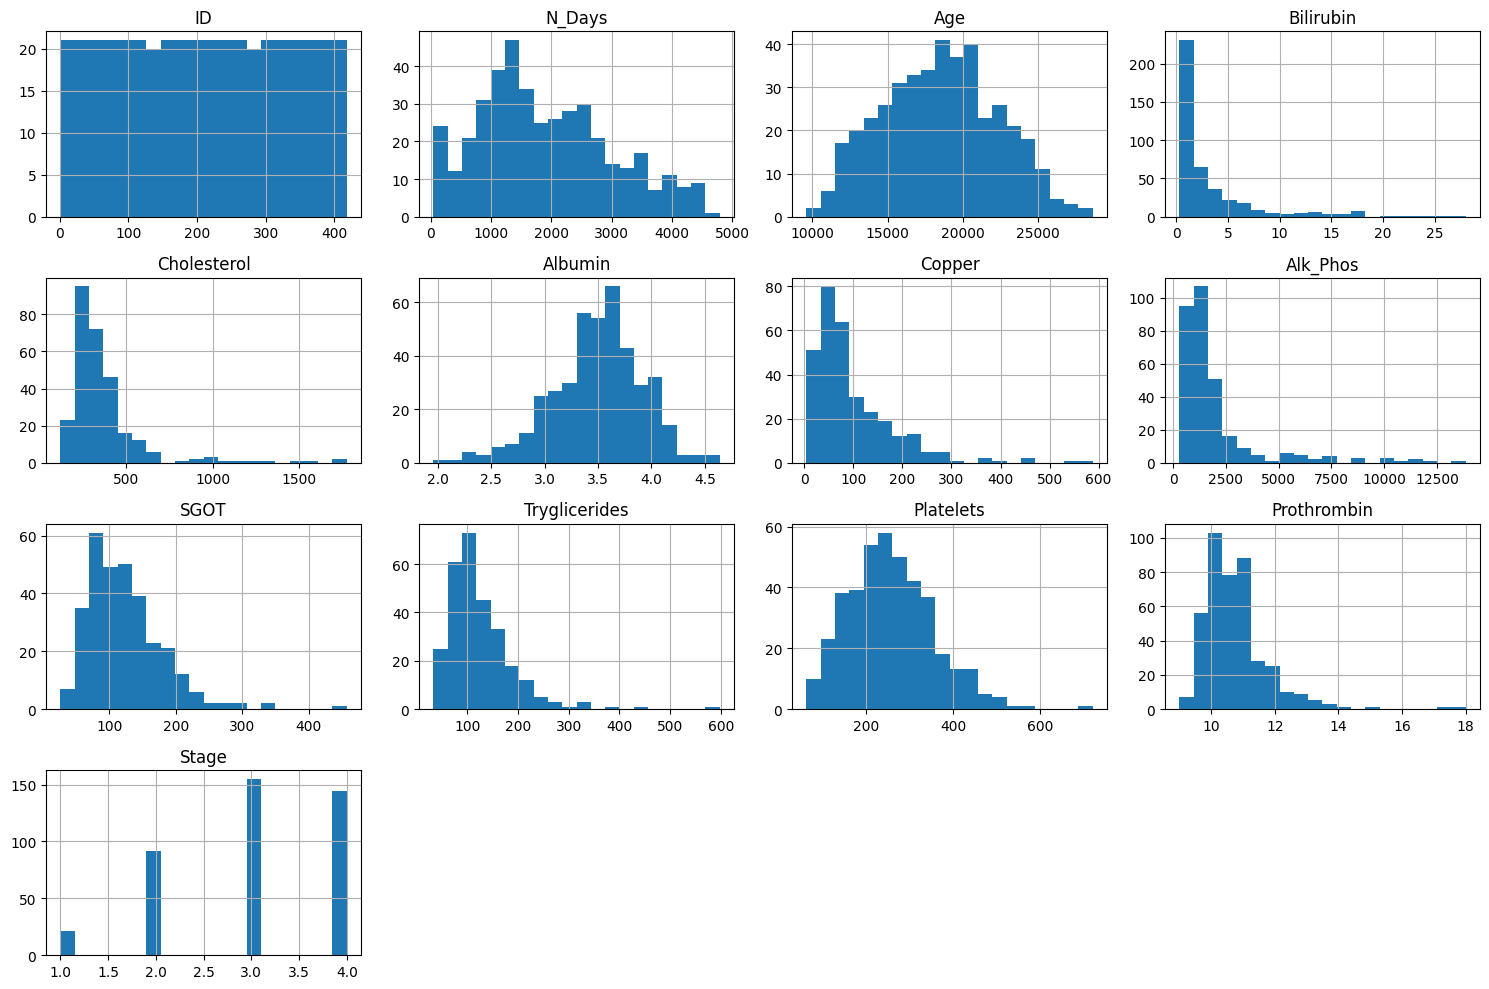

In [5]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [15]:
label_encoders = {}
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
    le = LabelEncoder()
    label = le.fit_transform(df[col].astype(str))
    df[col] = label
    label_encoders[col] = le

mappings = {}
for col, le in label_encoders.items():
    mappings[col] = {index: label for index, label in enumerate(le.classes_)}

print(mappings)
print(df.info())

# Impute missing values
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df.isnull().sum())


{}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    float64
 3   Drug           418 non-null    float64
 4   Age            418 non-null    float64
 5   Sex            418 non-null    float64
 6   Ascites        418 non-null    float64
 7   Hepatomegaly   418 non-null    float64
 8   Spiders        418 non-null    float64
 9   Edema          418 non-null    float64
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothro

In [16]:
X = df.drop(columns=['ID', 'Stage', 'Status', 'N_Days'])
y = df['Stage']

                     ID    N_Days    Status      Drug       Age       Sex  \
ID             1.000000 -0.354305 -0.282416  0.615910  0.037136 -0.083855   
N_Days        -0.354305  1.000000 -0.416651 -0.119046 -0.125934 -0.007386   
Status        -0.282416 -0.416651  1.000000 -0.060126  0.191525  0.118189   
Drug           0.615910 -0.119046 -0.060126  1.000000  0.034578 -0.074747   
Age            0.037136 -0.125934  0.191525  0.034578  1.000000  0.163341   
Sex           -0.083855 -0.007386  0.118189 -0.074747  0.163341  1.000000   
Ascites        0.706790 -0.204354  0.017576  0.798565  0.168340 -0.052482   
Hepatomegaly   0.606797 -0.255029  0.113355  0.725940  0.135407 -0.021625   
Spiders        0.637938 -0.230766  0.042589  0.741174  0.084747 -0.109248   
Edema         -0.159830 -0.304634  0.303299 -0.063520  0.196916  0.033229   
Bilirubin     -0.062154 -0.403953  0.429722  0.030382  0.002362 -0.027652   
Cholesterol   -0.069327 -0.099322  0.161330 -0.089304 -0.145054  0.002405   

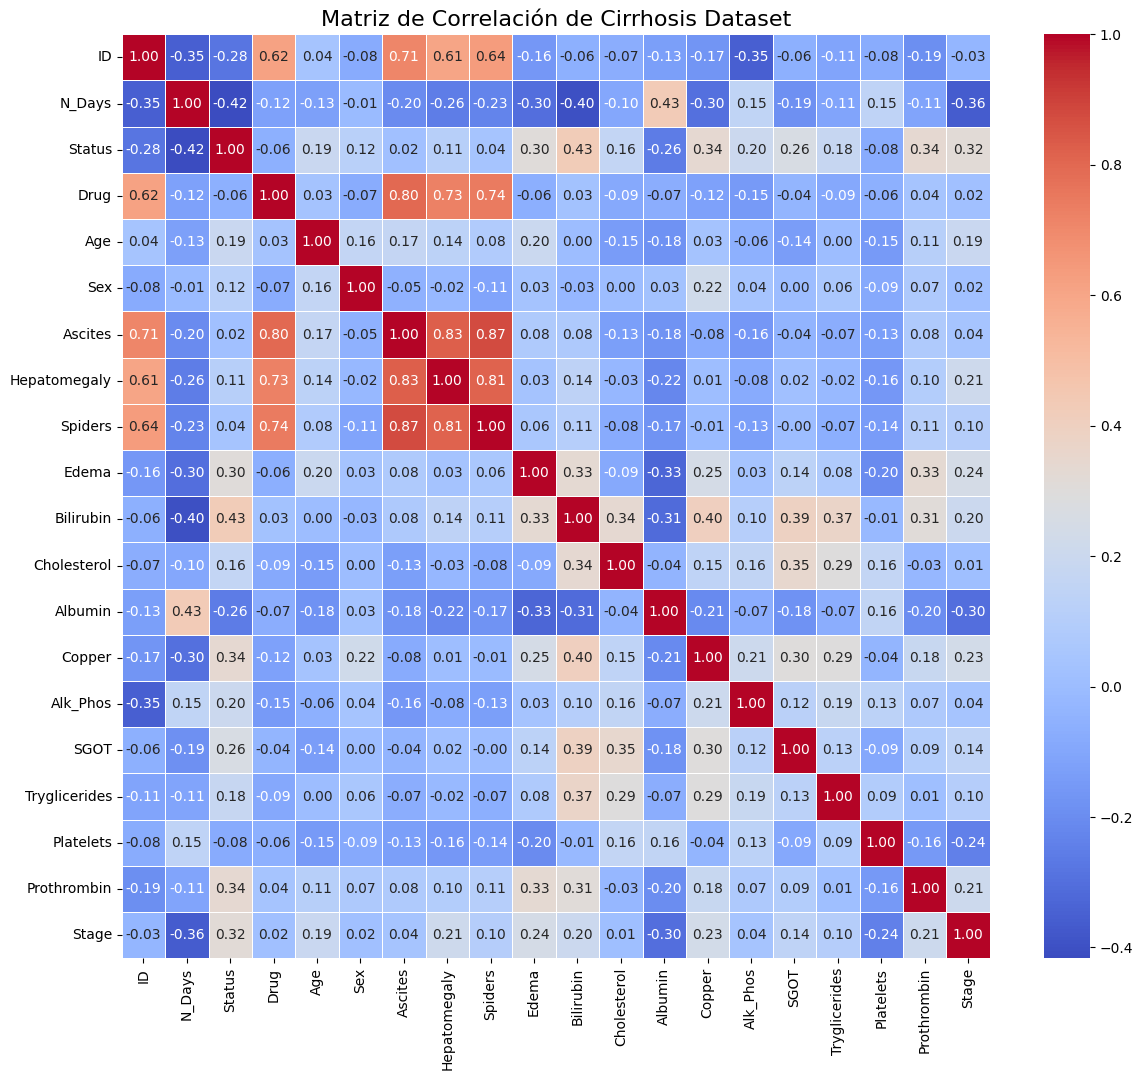

In [12]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 12))
plt.title('Matriz de Correlación de Cirrhosis Dataset', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


# Modelo machine learning


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


# Evaluaciones

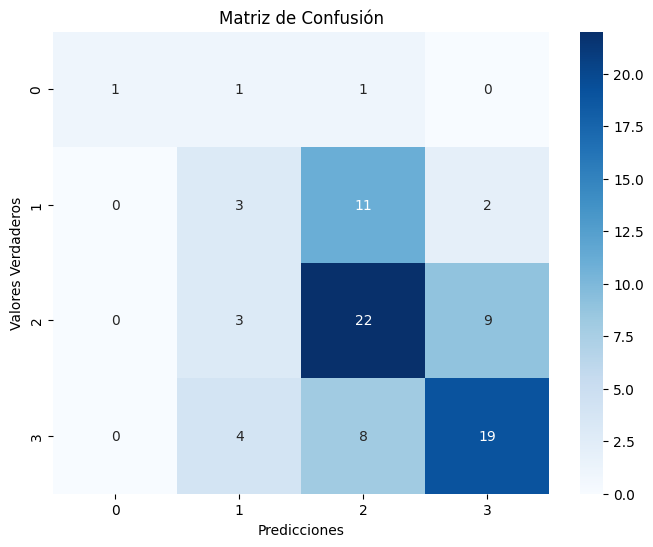

              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.27      0.19      0.22        16
         3.0       0.52      0.65      0.58        34
         4.0       0.63      0.61      0.62        31

    accuracy                           0.54        84
   macro avg       0.61      0.45      0.48        84
weighted avg       0.53      0.54      0.52        84



In [19]:

y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

print(classification_report(y_test, y_pred))


# Resultados
Los resultados del modelo muestran un **accuracy del 54%**, con un rendimiento variado entre las diferentes etapas de la cirrosis. La clase 1 presenta una precisión perfecta (1.00) pero un recall bajo (0.33), lo que indica que el modelo predijo correctamente pocas instancias de esta clase. Para las clases 2 y 3, la precisión y el recall son bajos, especialmente en la clase 2 con una precisión de 0.27 y un recall de 0.19. La clase 4 tiene un rendimiento más equilibrado, con una precisión de 0.63 y un recall de 0.61. En general, el modelo tiene dificultades para predecir correctamente las clases minoritarias, lo que afecta el rendimiento global.